In [1]:
import matplotlib.pyplot as plt

import torch
import torch.utils.data as Data
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable


# hyper parameter
LR = 0.01
BATCH_SIZE = 32
EPOCH = 20

# data
x = torch.unsqueeze(torch.linspace(-1,1,1000),dim=1)  # unsqueeze 確保 shape (1000,1)

y = x.pow(2) + 0.1 * torch.normal(torch.zeros(*x.size())) 


plt.scatter(x.numpy(),y.numpy())
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
x.size()

torch.Size([1000, 1])

In [3]:
#data set

dataset = Data.TensorDataset(x,y)

data_loader = Data.DataLoader(
    dataset=dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)

In [4]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)   # hidden layer
        self.predict = torch.nn.Linear(20, 1)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [5]:
nets = {
    "net_SGD" : Model(),
    "net_momentum" : Model(),
    "net_adam" : Model(),
    "net_adagrad" : Model(),
    "net_adadelta": Model(),
}

In [6]:
optimizers={
    "SGD" : optim.SGD(nets["net_SGD"].parameters(),lr = LR),
    "Momentum" : optim.SGD(nets["net_momentum"].parameters(),lr=LR,momentum=0.8),
    "Adam" : optim.Adam(nets["net_adam"].parameters(),lr=LR,betas=(0.9,0.99)),
    "Adagrad" : optim.Adagrad(nets["net_adagrad"].parameters(),lr=LR),
    "Adadelta": optim.Adadelta(nets["net_adadelta"].parameters(),lr=1)
}


In [7]:
loss_func = torch.nn.MSELoss()
loss_history = [[] for _ in range(len(nets))]

In [8]:

for epoch in range(EPOCH+1):
    if epoch%10==0:
        print("Epoch: ",epoch)
    


    for step ,(b_x,b_y)in enumerate(data_loader):
        for model , opti ,l_h in zip(nets.values(),optimizers.values(),loss_history):
            
            output = model(b_x)
            loss = loss_func(output,b_y)
            opti.zero_grad()
            loss.backward()
            opti.step()
            l_h.append(loss.data.numpy())
            
        

Epoch:  0
Epoch:  10
Epoch:  20


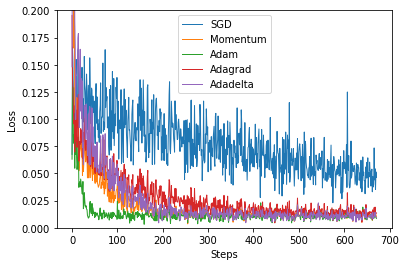

In [9]:
labels = [o for o in optimizers.keys()]



for i,l_h in enumerate(loss_history):
    plt.plot(l_h,label=labels[i],linewidth=1)
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()